## Student name: Parth Bhanderi
## Student ID  : 11704283
## Assignment: Regression

### Part 1: Data Wrangling (50 pts)
You have to write code to answer the questions below
7 pts each subtask except for the first one (importing pandas...) which is worth 1 pt

In [2]:
# Importing dataset in the workspace

import pandas as pd

df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


([<matplotlib.patches.Wedge at 0x185a6dc2fe0>,
 [Text(-0.5182755321100738, 0.9702527881001013, 'Yes'),
  Text(0.5182755321100742, -0.9702527881001012, 'No')],
 [Text(-0.28269574478731296, 0.5292287935091461, '65.62%'),
  Text(0.28269574478731313, -0.529228793509146, '34.38%')])

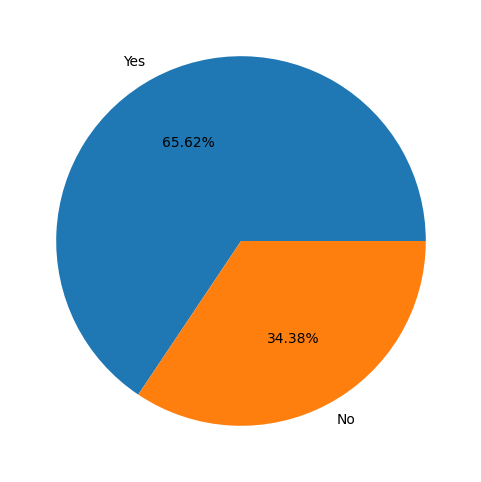

In [3]:
# defining ever_married column as a pie chart
import matplotlib.pyplot as plt

positive = (df['ever_married'] == 'Yes').sum()
negative = (df['ever_married'] == 'No').sum()

positive_percentage = (positive/len(df)) * 100
negative_percentage = (negative/len(df)) * 100

percentages = [positive_percentage, negative_percentage]

plt.figure(figsize = (6, 6))
plt.pie(percentages, labels = ['Yes', 'No'], autopct = '%1.02f%%', startangle = 0)

In [5]:
# one-hot encoding
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,NaN,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0,False,False,True,False,True,False,False,True,False,True,False
5106,44873,81.0,0,0,125.20,40.0,0,False,False,True,False,False,True,False,True,False,True,False
5107,19723,35.0,0,0,82.99,30.6,0,False,False,True,False,False,True,False,False,False,True,False
5108,37544,51.0,0,0,166.29,25.6,0,True,False,True,False,True,False,False,False,True,False,False


Answer: Used one-hot encoding because ordinal encoding is used when the data is in ordinary form and we have to rank it according to its value. Forcing an ordinal relationship via an ordinal encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories). Thus here we used one-hot encoding to categorise the data.   

In [6]:
# Calculate the percentage of missing rows in the columns and display them in ascending order
missing_rows = ((df.isnull().sum())/len(df) * 100).sort_values(ascending=True)
missing_rows

id                                0.000000
smoking_status_formerly smoked    0.000000
Residence_type_Urban              0.000000
work_type_children                0.000000
work_type_Self-employed           0.000000
work_type_Private                 0.000000
work_type_Never_worked            0.000000
ever_married_Yes                  0.000000
gender_Other                      0.000000
gender_Male                       0.000000
stroke                            0.000000
avg_glucose_level                 0.000000
heart_disease                     0.000000
hypertension                      0.000000
age                               0.000000
smoking_status_never smoked       0.000000
smoking_status_smokes             0.000000
bmi                               3.933464
dtype: float64

In [7]:
# filling all null  rows with Iterative Imputer and showing sum of all the null values 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(df)
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

df = imputed_df
df.isnull().sum().sum()

0

In [8]:
# showing 'bmi' column in specific bins
bin_edges = [0, 18.4, 24.9, 29.9, 34.9, 100]
labels = ['underweight', 'normal', 'overweight', 'obsese', 'extremly_obsese']

pd.cut(df['bmi'], bins=bin_edges, labels=labels)

0       extremly_obsese
1                obsese
2                obsese
3                obsese
4                normal
             ...       
5105             obsese
5106    extremly_obsese
5107             obsese
5108         overweight
5109         overweight
Name: bmi, Length: 5110, dtype: category
Categories (5, object): ['underweight' < 'normal' < 'overweight' < 'obsese' < 'extremly_obsese']

In [9]:
# showing 'avg_glucose_level' column in 10 different levels of bins
glucose_bin = [0, 28, 56, 84, 112, 140, 168, 196, 224, 252, 280]
labels = ['level 1', 'level 2', 'level 3', 'level 4', 'level 5', 'level 6', 'level 7', 'level 8', 'level 9', 'level 10']

pd.cut(df['avg_glucose_level'], bins=glucose_bin, labels=labels)

0       level 9
1       level 8
2       level 4
3       level 7
4       level 7
         ...   
5105    level 3
5106    level 5
5107    level 3
5108    level 6
5109    level 4
Name: avg_glucose_level, Length: 5110, dtype: category
Categories (10, object): ['level 1' < 'level 2' < 'level 3' < 'level 4' ... 'level 7' < 'level 8' < 'level 9' < 'level 10']

In [10]:
# showing 'avg_glucose_level' in 5 different categoeis
glucose_bin = [55.119, 73.76, 85.6, 98.914, 124.16, 271.74]
labels = ['(55.119, 73.76]', '(73.76, 85.6]', '(85.6, 98.914]', '(98.914, 124.16]', '(124.16, 271.74]']

pd.cut(df['avg_glucose_level'], bins=glucose_bin, labels=labels)

0       (124.16, 271.74]
1       (124.16, 271.74]
2       (98.914, 124.16]
3       (124.16, 271.74]
4       (124.16, 271.74]
              ...       
5105       (73.76, 85.6]
5106    (124.16, 271.74]
5107       (73.76, 85.6]
5108    (124.16, 271.74]
5109       (73.76, 85.6]
Name: avg_glucose_level, Length: 5110, dtype: category
Categories (5, object): ['(55.119, 73.76]' < '(73.76, 85.6]' < '(85.6, 98.914]' < '(98.914, 124.16]' < '(124.16, 271.74]']

### Part 2: Logistic Regression(50 pts)

In [11]:
# setting id as a index
if 'id' in df.columns:
    df.set_index('id', inplace=True)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,
9046.0,67.0,0.0,1.0,228.69,36.600000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
51676.0,61.0,0.0,0.0,202.21,31.137119,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
31112.0,80.0,0.0,1.0,105.92,32.500000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
60182.0,49.0,0.0,0.0,171.23,34.400000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1665.0,79.0,1.0,0.0,174.12,24.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234.0,80.0,1.0,0.0,83.75,32.355799,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
44873.0,81.0,0.0,0.0,125.20,40.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
19723.0,35.0,0.0,0.0,82.99,30.600000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Answer: If we retain the 'id' column as a non-indexed feature, it might negatively impact the accuracy of our model due to the wide range of values within the 'id' column. Additionally, it's essential to note that 'id' does not represent a meaningful feature in our dataset; it serves solely as a unique identifier for each record and holds no relevance to our model's predictive capabilities. Given these considerations, it is reasonable to convert 'id' into the index because all its values are unique, making it straightforward to establish a direct mapping to specific records.







In [12]:
# splitting data into train and test part
import numpy as np
from sklearn.model_selection import train_test_split

y = df['stroke']
X = df.drop('stroke', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

20 pts
Write a class My_LR that implements Logistic Regression algorithm. You are required to have the following attributes
* Method:
    * fit
    * predict

<br> Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
<br> **Using a pre-built library yields no credit. You have to write everything from scratch.**

In [13]:
# Logistic regression
import copy
import numpy as np
from sklearn.metrics import accuracy_score

class My_LR:
   
    def fit(self, x, y):
        x = self._transform_x(x)
        y = self._transform_y(y)
    
        self.weights = np.zeros(x.shape[1])
        self.bias = 0
        epochs = 150
        for i in range(epochs):
            x_dot_weights = np.matmul(self.weights, x.transpose()) + self.bias
            pred = self._sigmoid(x_dot_weights)
            loss = self.compute_loss(y, pred)
            error_w, error_b = self.compute_gradients(x, y, pred)
            self.update_model_parameters(error_w, error_b)
    
            pred_to_class = [1 if p > 0.5 else 0 for p in pred]

    def compute_loss(self, y_true, y_pred):
        # binary cross entropy
        y_zero_loss = y_true * np.log(y_pred + 1e-9)
        y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
        return -np.mean(y_zero_loss + y_one_loss)

    def _sigmoid(self, x):
        return np.array([self._sigmoid_function(value) for value in x])

    def _sigmoid_function(self, x):
        if x >= 0:
            z = np.exp(-x)
            return 1 / (1 + z)
        else:
            z = np.exp(x)
            return z / (1 + z)

    def compute_gradients(self, x, y_true, y_pred):
        # derivative of binary cross entropy
        difference =  y_pred - y_true
        gradient_b = np.mean(difference)
        gradients_w = np.matmul(x.transpose(), difference)
        gradients_w = np.array([np.mean(grad) for grad in gradients_w])
    
        return gradients_w, gradient_b

    def update_model_parameters(self, error_w, error_b):
        self.weights = self.weights - 0.1 * error_w
        self.bias = self.bias - 0.1 * error_b

    def _transform_x(self, x):
        x = copy.deepcopy(x)
        return x.values

    def _transform_y(self, y):
        y = copy.deepcopy(y)
        return y.values.reshape(y.shape[0], 1)

    def predict(self, x):
        x_dot_weights = np.matmul(x, self.weights.transpose()) + self.bias
        probabilities = self._sigmoid(x_dot_weights)
        return [1 if p > 0.5 else 0 for p in probabilities]


In [14]:
# Run the code
reg = My_LR()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [15]:
# Use a metric of either accuracy_score or balanced_accuracy_score to evaluate
from sklearn.metrics import accuracy_score, balanced_accuracy_score
print('Accuracy Score: ',accuracy_score(y_test, y_pred))
print('Balanced Accuracy Score',balanced_accuracy_score(y_test, y_pred))

Accuracy Score:  0.8992172211350293
Balanced Accuracy Score 0.5636001386001386


Answer: Here I used both the Accuracy score and Balanced Accuracy Score and I prefer the Accuracy score over the Balanced Accuracy score because it gives better results as accuracy is 89%.